In [1]:
import json_lines
from langdetect import detect
from langdetect import detect_langs
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.neural_network import MLPClassifier
import numpy as np

from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()
REMOVEABLE_CHARS = "»<>123456789\/&()?:!.,;'´"
ALL_TAGS = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT',
 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP',
 'WP$', 'WRB']
ACCEPTABLE_TAGS = ['CC', 'DT', 'EX', 'FW', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'PDT',
 'POS', 'PRP', 'PRP$', 'RP', 'TO', 'UH', 'VBD', 'VBG', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
MAX_FEATURES = 500
MIN_ENGLISH = 0.9999
LIMIT_INPUT_ROWS = 5000 # to stop run times hindering development (making this < 500 usually makes the graph angry)

def get_wordnet_pos(tag): # Return a char, based on input tag, that is used as a param in lemmatisation for enhanced results
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [2]:
# READ IN INFO
reviews= []; polarity= []; are_early= [];
with open ('reviews.json', 'rb') as f:
    for i, item in enumerate(json_lines.reader(f)):
        if i <= LIMIT_INPUT_ROWS:
            try:
                langs = detect_langs(item['text'])
            except:
                pass
            for i, lang in enumerate(langs):
                if str(lang)[0:2] == 'en':
                    if float(str(lang)[3:]) > MIN_ENGLISH:
                        reviews.append(item['text'])
                        polarity.append(item['voted_up'])
                        are_early.append(item['early_access'])

In [4]:
# FILTER TEXT
for i, text in enumerate(reviews):
    text_words = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(text_words)
    #print(tags)
    new_text= [];
    for j, word in enumerate(text_words):
        for char in word:
            if char in REMOVEABLE_CHARS:
                break
        else:
            wordnet_pos = get_wordnet_pos(tags[j][1])
            if wordnet_pos != '':
                new_text.append(lemmatizer.lemmatize(word, wordnet_pos))
            continue
    reviews[i] = new_text

for i, text in enumerate(reviews): 
    new_text= [];
    tags = nltk.pos_tag(reviews[i])
    for j, word in enumerate(text):
        if tags[j][1] in ACCEPTABLE_TAGS:
            new_text.append(word)
    reviews[i] = new_text
    #print(tags)

In [6]:
# MOST FREQ WORDS AS FEATURES
word_counts = {};
for text in reviews:
    for word in text:
        if word in word_counts:
            word_counts[word]+= 1
        else:
            word_counts[word]= 1
word_counts = {k: v for k, v in sorted(word_counts.items(), key=lambda item: item[1], reverse=True)}
trimd_word_counts = {}
if len(word_counts) > MAX_FEATURES:
    for i, entry in enumerate(word_counts):
        if i >= MAX_FEATURES:
            break
        trimd_word_counts[entry] = word_counts[entry]
word_counts = trimd_word_counts

tags = nltk.pos_tag(word_counts.keys()); # this part is just for the below print statement
for i, word in enumerate(word_counts):
    print("word: ", word, "| tag: ", tags[i][1], "| count: ",word_counts[word],"\n")

word:  i | tag:  RB | count:  55 

word:  good | tag:  JJ | count:  49 

word:  great | tag:  JJ | count:  32 

word:  other | tag:  JJ | count:  31 

word:  best | tag:  JJS | count:  25 

word:  many | tag:  JJ | count:  22 

word:  new | tag:  JJ | count:  21 

word:  more | tag:  JJR | count:  20 

word:  fun | tag:  NN | count:  20 

word:  much | tag:  RB | count:  18 

word:  last | tag:  JJ | count:  16 

word:  up | tag:  RP | count:  16 

word:  out | tag:  RB | count:  14 

word:  different | tag:  JJ | count:  13 

word:  big | tag:  JJ | count:  12 

word:  same | tag:  JJ | count:  12 

word:  few | tag:  JJ | count:  12 

word:  nice | tag:  JJ | count:  12 

word:  hard | tag:  JJ | count:  12 

word:  graphic | tag:  JJ | count:  11 

word:  main | tag:  JJ | count:  9 

word:  own | tag:  JJ | count:  9 

word:  u | tag:  JJ | count:  9 

word:  amazing | tag:  VBG | count:  9 

word:  bad | tag:  JJ | count:  9 

word:  enjoyable | tag:  JJ | count:  9 

word:  easy 

word:  steal | tag:  NN | count:  2 

word:  queen | tag:  JJ | count:  2 

word:  tribe | tag:  JJ | count:  2 

word:  male | tag:  JJ | count:  2 

word:  female | tag:  NN | count:  2 

word:  text | tag:  NN | count:  2 

word:  ancient | tag:  NN | count:  2 

word:  rule | tag:  NN | count:  2 

word:  tie | tag:  IN | count:  2 

word:  fantastic | tag:  JJ | count:  2 

word:  map | tag:  NNS | count:  1 

word:  friendly | tag:  RB | count:  1 

word:  o | tag:  VBP | count:  1 

word:  complainer | tag:  NN | count:  1 

word:  t | tag:  NN | count:  1 

word:  kinda | tag:  NN | count:  1 

word:  opengl | tag:  NN | count:  1 

word:  sk | tag:  JJ | count:  1 

word:  feature | tag:  NN | count:  1 

word:  sword | tag:  NN | count:  1 

word:  xd | tag:  NNP | count:  1 

word:  weps | tag:  VBZ | count:  1 

word:  key | tag:  JJ | count:  1 

word:  variable | tag:  JJ | count:  1 

word:  ground | tag:  NN | count:  1 

word:  rly | tag:  RB | count:  1 

word:  decid

word:  extra | tag:  VBP | count:  1 

word:  like | tag:  IN | count:  1 

word:  follow | tag:  VBP | count:  1 

word:  paranormal | tag:  JJ | count:  1 

word:  suppose | tag:  NN | count:  1 

word:  go | tag:  VB | count:  1 

word:  ride | tag:  JJ | count:  1 

word:  creepy | tag:  NN | count:  1 

word:  increment | tag:  NN | count:  1 

word:  narrative | tag:  JJ | count:  1 

word:  uneasy | tag:  JJ | count:  1 

word:  acting | tag:  VBG | count:  1 

word:  low-budget | tag:  NN | count:  1 

word:  shot | tag:  NN | count:  1 

word:  fetching | tag:  VBG | count:  1 

word:  thirty | tag:  JJ | count:  1 

word:  intellectual | tag:  JJ | count:  1 

word:  include | tag:  VBP | count:  1 

word:  turn-based | tag:  JJ | count:  1 

word:  make | tag:  VBP | count:  1 

word:  keen | tag:  JJ | count:  1 

word:  bat | tag:  NN | count:  1 

word:  urgent | tag:  JJ | count:  1 

word:  stage | tag:  NN | count:  1 

word:  essential | tag:  JJ | count:  1 

word:  

In [7]:
# CREATE 1-HOT ENCODINGS
one_hots = [];
for text in reviews:
    one_hot = [];
    for i in range(MAX_FEATURES):
        one_hot.append(0)
    for word in text:
        if word in word_counts:
            one_hot[list(word_counts).index(word)]+= 1
    one_hots.append(one_hot)

for i, one_hot in enumerate(one_hots): # convert array of lists into 2d array
    one_hot_arr = np.array(one_hot)
    one_hots[i] = one_hot_arr
one_hots = np.array(one_hots)

overall accuracy:  1.0


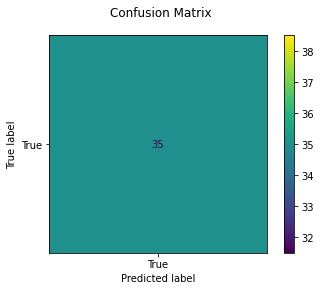

In [8]:
# TRAIN, PREDICT, GRAPH
X_train, X_test, y_train, y_test = train_test_split(one_hots, polarity, random_state=1, test_size=0.2) # change the second param here to switch between polarity and early_access
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="relu", random_state=1).fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
print("overall accuracy: ",clf.score(X_test_scaled, y_test))

fig=plot_confusion_matrix(clf, X_test_scaled, y_test)
fig.figure_.suptitle("Confusion Matrix")
plt.show()